In [1]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Now you can import from src
from src.data_utils import load_and_process_taxi_data

import pandas as pd

import dagshub
dagshub.init(repo_owner="siddharthadhikari85", repo_name="NYC_taxi", mlflow=True)

Accessing as siddharthadhikari85

Initialized MLflow to track repo "siddharthadhikari85/NYC_taxi"

Repository siddharthadhikari85/NYC_taxi initialized!

In [2]:
rides1 = load_and_process_taxi_data(year=2022)
rides2=(load_and_process_taxi_data(year=2023))
rides = pd.concat([rides1,rides2],ignore_index=True)

File already exists for 2022-01.
Loading data for 2022-01...
Total records: 2,463,931
Valid records: 2,415,141
Records dropped: 48,790 (1.98%)
Successfully processed data for 2022-01.
File already exists for 2022-02.
Loading data for 2022-02...
Total records: 2,979,431
Valid records: 2,921,118
Records dropped: 58,313 (1.96%)
Successfully processed data for 2022-02.
File already exists for 2022-03.
Loading data for 2022-03...
Total records: 3,627,882
Valid records: 3,551,986
Records dropped: 75,896 (2.09%)
Successfully processed data for 2022-03.
File already exists for 2022-04.
Loading data for 2022-04...
Total records: 3,599,920
Valid records: 3,522,113
Records dropped: 77,807 (2.16%)
Successfully processed data for 2022-04.
File already exists for 2022-05.
Loading data for 2022-05...
Total records: 3,588,295
Valid records: 3,509,056
Records dropped: 79,239 (2.21%)
Successfully processed data for 2022-05.
File already exists for 2022-06.
Loading data for 2022-06...
Total records: 3,55

In [3]:
temp_rides = rides[rides["pickup_location_id"] == 43]

In [4]:
from src.data_utils import transform_raw_data_into_ts_data

ts_data = transform_raw_data_into_ts_data(temp_rides)
ts_data.head()

/Users/siddharthadhikari/github/NYC_taxi/src/data_utils.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides["pickup_hour"] = rides["pickup_datetime"].dt.floor("h")


,pickup_hour,pickup_location_id,rides
0,2022-01-01 00:00:00,43,96
1,2022-01-01 01:00:00,43,60
2,2022-01-01 02:00:00,43,22
3,2022-01-01 03:00:00,43,8
4,2022-01-01 04:00:00,43,4


In [5]:
ts_data

,pickup_hour,pickup_location_id,rides
0,2022-01-01 00:00:00,43,96
1,2022-01-01 01:00:00,43,60
2,2022-01-01 02:00:00,43,22
3,2022-01-01 03:00:00,43,8
4,2022-01-01 04:00:00,43,4
...,...,...,...
17515,2023-12-31 19:00:00,43,55
17516,2023-12-31 20:00:00,43,72
17517,2023-12-31 21:00:00,43,50
17518,2023-12-31 22:00:00,43,28


In [6]:
ts_data = ts_data.drop(columns=["pickup_location_id"])

In [7]:
print(ts_data.head())


          pickup_hour  rides
0 2022-01-01 00:00:00     96
1 2022-01-01 01:00:00     60
2 2022-01-01 02:00:00     22
3 2022-01-01 03:00:00      8
4 2022-01-01 04:00:00      4


In [8]:
import pandas as pd

# Convert pickup_hour to datetime and set as index
ts_data["pickup_hour"] = pd.to_datetime(ts_data["pickup_hour"])
ts_data.set_index("pickup_hour", inplace=True)

# Ensure data is in time series format
ts_data = ts_data.asfreq("H")  # Hourly frequency


In [9]:
import numpy as np
ts_data["rides"] = ts_data["rides"].astype(np.float32)

In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(ts_data["rides"])

# Print results
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -11.985971760390953
p-value: 3.6125672806628613e-22


In [11]:
from pmdarima import auto_arima

# Find best ARMA(p, q) order
model_auto = auto_arima(ts_data["rides"], seasonal=False, stepwise=True, trace=True)

# Print best parameters
print(model_auto.summary())


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=162977.313, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=210122.120, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=165205.279, Time=0.08 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=191455.692, Time=0.43 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=164599.482, Time=0.71 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=164969.807, Time=0.83 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=3.40 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=162484.750, Time=1.46 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=163384.864, Time=1.02 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=162468.514, Time=1.74 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=159186.746, Time=3.95 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=162619.471, Time=1.44 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,3)(0,0,0)[0]             : AIC=162613.219, Time=4.35 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,0,0)[0]             : AIC=156840.094, Time=5.35 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,0,0)[0]             : AIC=162451.439, Time=2.73 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,4)(0,0,0)[0]             : AIC=inf, Time=7.78 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,5)(0,0,0)[0]             : AIC=161959.804, Time=5.11 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,5)(0,0,0)[0]             : AIC=158948.964, Time=5.84 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,5)(0,0,0)[0]             : AIC=inf, Time=6.20 sec


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=158569.328, Time=10.81 sec

Best model:  ARIMA(4,0,4)(0,0,0)[0]          
Total fit time: 64.303 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                17520
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -78411.047
Date:                Wed, 05 Mar 2025   AIC                         156840.094
Time:                        20:32:22   BIC                         156910.034
Sample:                    01-01-2022   HQIC                        156863.123
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          3.1061      0.023    136.709      0.000       3.

In [12]:
from sklearn.metrics import mean_absolute_error

# Split data into train and test sets
train_size = int(len(ts_data) * 0.8)  # Use 80% for training, 20% for testing
train, test = ts_data.iloc[:train_size], ts_data.iloc[train_size:]

# Fit ARMA model on training data
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train["rides"], order=(4, 0, 3))  # Best ARMA(p=4, q=4)
arma_result = model.fit()

# Forecast on the test set
forecast = arma_result.forecast(steps=len(test))

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(test["rides"], forecast)
print("Mean Absolute Error (MAE):", mae)


/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/NYC_taxi/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (MAE): 23.34963338497838


In [13]:
import mlflow
mlflow.set_experiment("model_arma")

# Start an MLflow run
with mlflow.start_run():
        mlflow.log_metric("mean_absolute_error", mae)

2025/03/05 00:47:34 INFO mlflow.tracking.fluent: Experiment with name 'model_arma' does not exist. Creating a new experiment.


🏃 View run suave-smelt-529 at: https://dagshub.com/siddharthadhikari85/NYC_taxi.mlflow/#/experiments/7/runs/40ef4bc1d0d340ac97581cded8a611b2
🧪 View experiment at: https://dagshub.com/siddharthadhikari85/NYC_taxi.mlflow/#/experiments/7


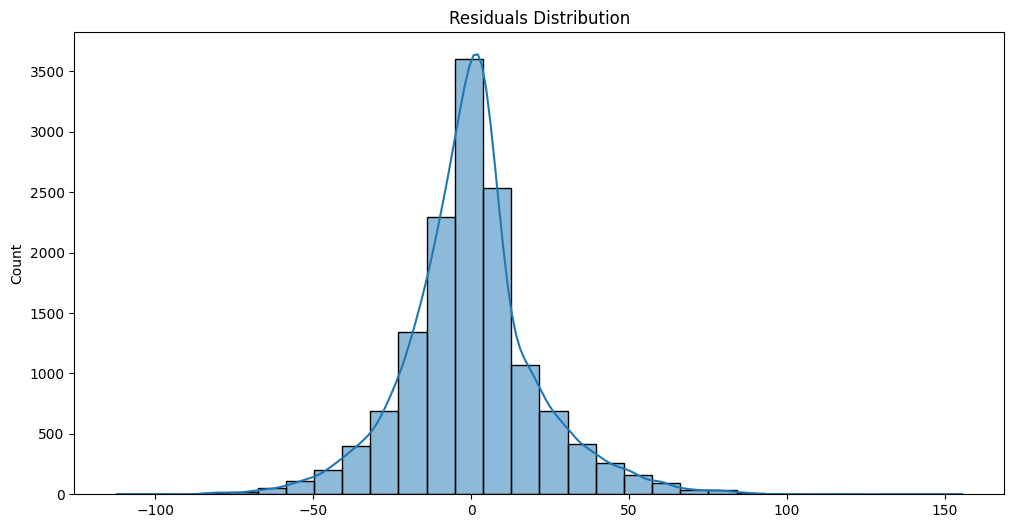

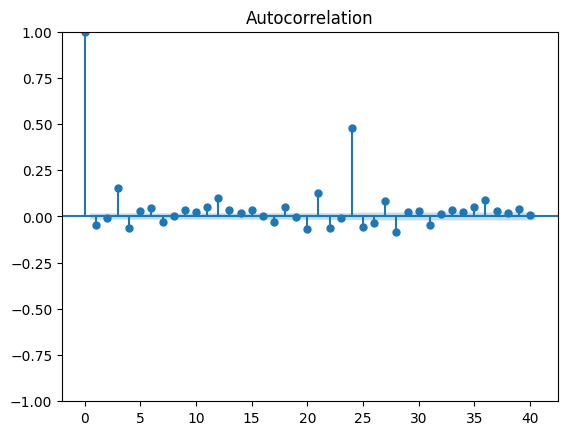

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Plot residuals
residuals = arma_result.resid

plt.figure(figsize=(12,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Check ACF (Autocorrelation) of residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()


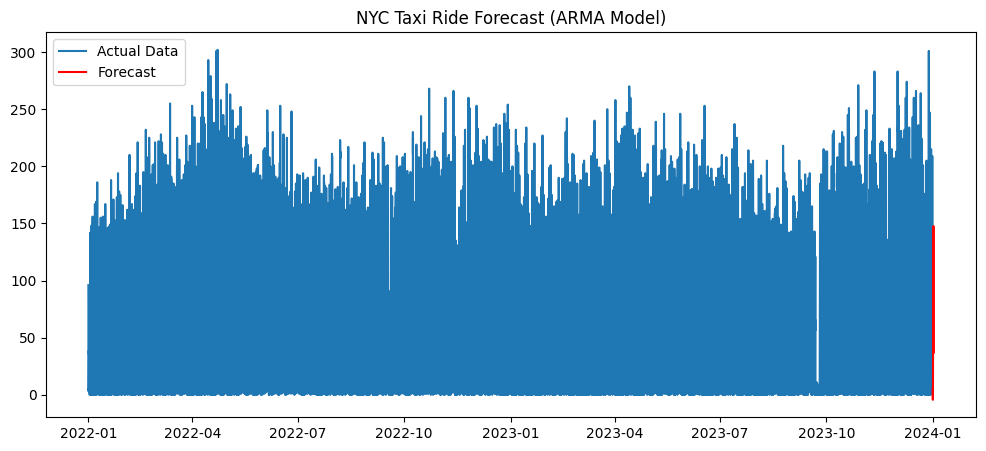

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Forecast next 24 hours
forecast_steps = 24
forecast = arma_result.forecast(steps=forecast_steps)

# Create date index for forecast
forecast_index = pd.date_range(start=ts_data.index[-1], periods=forecast_steps+1, freq="H")[1:]

# Plot results
plt.figure(figsize=(12,5))
plt.plot(ts_data.index, ts_data["rides"], label="Actual Data")
plt.plot(forecast_index, forecast, label="Forecast", color="red")
plt.legend()
plt.title("NYC Taxi Ride Forecast (ARMA Model)")
plt.show()
